# Text Mining Project

In [1]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Inspecting dataset

In [2]:
df = pd.read_csv("Friends.csv")
display(df)

Text  Speaker  \
0      Originally written by Marta Kauffman and David...      NaN   
1                              Transcribed by guineapig.      NaN   
2       CENTRAL PERK. (ALL PRESENT EXCEPT RACHEL AND ...  SCENE 1   
3       There's nothing to tell! He's just some guy I...   MONICA   
4       C'mon, you're going out with the guy! There's...     JOEY   
...                                                  ...      ...   
69969   Then I'm happy too. (They're still hugging - ...     Ross   
69970                                   COMMERCIAL BREAK      NaN   
69971   Estelle's memorial service. Joey is giving a ...   [Scene   
69972   Thank you all for coming. We're here today to...     Joey   
69973                                            THE END      NaN   

                                                 Episode     Season     Show  
0      Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
1      Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
2      Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
3      Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
4      Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
...                                                  ...        ...      ...  
69969              Episode-15-The One Where Estelle Dies  Season-10  Friends  
69970              Episode-15-The One Where Estelle Dies  Season-10  Friends  
69971              Episode-15-The One Where Estelle Dies  Season-10  Friends  
69972              Episode-15-The One Where Estelle Dies  Season-10  Friends  
69973              Episode-15-The One Where Estelle Dies  Season-10  Friends  

[69974 rows x 5 columns]

In [3]:
unique_speakers = df['Speaker'].unique()
num_unique_speakers = len(unique_speakers)
print("All speakers included are: ", unique_speakers)
print("Number of speakers considered: ", num_unique_speakers)

All speakers included are:  [nan 'SCENE 1' 'MONICA' ... 'Lady' 'r Zelner' 'Answering machine']
Number of speakers considered:  1144


In [4]:
# Total number of Nans per column
df.isna().sum()

Text          0
Speaker    6284
Episode       0
Season        0
Show          0
dtype: int64

In [5]:
# All rows in dataframe of which the Speaker column has a NaN value
df[df.isna().any(axis=1)]

Text Speaker  \
0      Originally written by Marta Kauffman and David...     NaN   
1                              Transcribed by guineapig.     NaN   
7                            (THE OTHERS STARE, BEMUSED)     NaN   
11                                     (CUT TO SAME SET)     NaN   
20               (CUT TO SAME SET. ROSS HAS NOW ENTERED)     NaN   
...                                                  ...     ...   
69759                                    OPENING CREDITS     NaN   
69817  (Phoebe is outside, taking her cell phone out ...     NaN   
69856              (Chandler and Monica are speechless).     NaN   
69970                                   COMMERCIAL BREAK     NaN   
69973                                            THE END     NaN   

                                                 Episode     Season     Show  
0      Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
1      Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
7      Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
11     Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
20     Episode-01-The One Where Monica Gets a New Roo...  Season-01  Friends  
...                                                  ...        ...      ...  
69759              Episode-15-The One Where Estelle Dies  Season-10  Friends  
69817              Episode-15-The One Where Estelle Dies  Season-10  Friends  
69856              Episode-15-The One Where Estelle Dies  Season-10  Friends  
69970              Episode-15-The One Where Estelle Dies  Season-10  Friends  
69973              Episode-15-The One Where Estelle Dies  Season-10  Friends  

[6284 rows x 5 columns]

# Structuring

In [6]:
# Keep only relevant columns
columns_of_interest = ['Text', 'Speaker']
relevant_df = df[columns_of_interest]
display(relevant_df)

Text  Speaker
0      Originally written by Marta Kauffman and David...      NaN
1                              Transcribed by guineapig.      NaN
2       CENTRAL PERK. (ALL PRESENT EXCEPT RACHEL AND ...  SCENE 1
3       There's nothing to tell! He's just some guy I...   MONICA
4       C'mon, you're going out with the guy! There's...     JOEY
...                                                  ...      ...
69969   Then I'm happy too. (They're still hugging - ...     Ross
69970                                   COMMERCIAL BREAK      NaN
69971   Estelle's memorial service. Joey is giving a ...   [Scene
69972   Thank you all for coming. We're here today to...     Joey
69973                                            THE END      NaN

[69974 rows x 2 columns]

# Cleaning

C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


<AxesSubplot:>

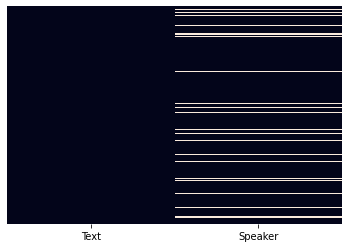

In [7]:
#identify nan values from string
relevant_df.replace('No data', np.nan, regex=True, inplace=True)
#display null values in heatmap
sns.heatmap(relevant_df.isnull(),yticklabels=False, cbar=False)

In [8]:
#drop rows with Nan Values 
relevant_df.dropna(inplace=True)
relevant_df.reset_index(inplace=True)
relevant_df.drop('index', axis=1, inplace=True)
display(relevant_df)

C:\Users\rensk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text   Speaker
0       CENTRAL PERK. (ALL PRESENT EXCEPT RACHEL AND ...   SCENE 1
1       There's nothing to tell! He's just some guy I...    MONICA
2       C'mon, you're going out with the guy! There's...      JOEY
3        So does he have a hump? A hump and a hairpiece?  CHANDLER
4                               Wait, does he eat chalk?    PHOEBE
...                                                  ...       ...
63685                         Yeah, yeah, oh! (They hug)      Ross
63686                              Oh! Oh, I'm so happy.    Rachel
63687   Then I'm happy too. (They're still hugging - ...      Ross
63688   Estelle's memorial service. Joey is giving a ...    [Scene
63689   Thank you all for coming. We're here today to...      Joey

[63690 rows x 2 columns]

In [9]:
# Visualizing data
for item in unique_speakers:
    print(item)

nan
SCENE 1
MONICA
JOEY
CHANDLER
PHOEBE
ALL
ROSS
RACHEL
WAITRESS
SCENE 2
PHOEBE+ROSS+CHANDLER+JOEY
PAUL
SCENE 3
TV
SCENE 4
SCENE 5
FRANNIE
CREDITS SCENE
PRE-INTRO SCENE
MARSHA
CAROL
CHANDLER+JOEY
MRS. GELLER
MR. GELLER
SUSAN
BARRY
ROBBIE
BERNICE (OVER INTERCOM)
BARRY (TO INTERCOM)
DR. OBERMAN
PAULA
ALAN (INTERCOM)
ALAN
THE GUYS
LIZZIE
SCENE 6
PRE-INTRO-SCENE
BOYS
LESLIE
KIKI
JOANNE
RECEPTIONIST
PIZZA GUY (OUTSIDE)
PIZZA GUY
MONICA+PHOEBE
BOTH
KID
[Scene
MNCA
RACH
CHAN
PHOE
ANGL
JNCE
WOMAN
BOB
[She leaves.] CHAN
(LIGHTS GO UP ON THE STAGE
AURORA
DIRECTOR
SCENE 7
JILL
MNCA/JOEY/PHOE
HECK
PAOLO
[Pre- intro scene
Shelley
Chandler
[Scene 1
Rachel
Monica
Phoebe
Joey
Ross
All
[Scene 2
Aunt Lillian
Mrs. Geller
Mr. Geller
Nurse
[Scene 3
[Scene 4
[Scene 5
[Scene 6
[Scene 7
[Scene 8
[Scene 9
Andrea
[Scene 10
[End credits. Scene
Lowell
Written by
Transcribed by
With Minor Adjustments by
Terry
Guy
Susan
Girl
(Joey turns around and sees his face on a poster in the subway. The poster says
Carol
[Pre-

In [10]:
# Turn all values in Speaker column to lowercase
relevant_df['Speaker'] = relevant_df['Speaker'].str.lower()

C:\Users\rensk\AppData\Local\Temp/ipykernel_8944/4193878769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['Speaker'] = relevant_df['Speaker'].str.lower()


In [11]:
# Manually checked all relevant speakers in dataframe
relevant_speakers = ['monica', 'mnca', 'joey', 'chandler', 'chan', 'phoebe', 'phoe', 'ross', 'rachel', 'rach', 'all', 'phoebe+ross+chandler+joey', 'chandler+joey', 'monica+phoebe', 'mnca/joey/phoe', 'monica and phoebe', 'joey, chandler, and ross', 'joey and chandler', 'rachel and phoebe', 'rachel/phoebe', 'chandler and joey', 'monica & rachel', 'chandler & joey', 'rachel and monica', 'chandler, ross', 'phoebe, rachel', 'ross and rachel', 'joey+ross', 'phoebe and rachel', 'ross, rachel & phoebe', 'joey, chandler & ross', 'phoebe, joey & ross', 'mnca/phoe', 'phoe/mnca', 'ross/julie', 'rahcel', 'joey/chan', 'chan, joey, ross', 'chandler, monica, and joey', 'ross, chandler & joey', 'monica and rachel', 'monica and ross', 'rachel, monica, roy, and chip', 'chandler, joey, and phoebe', 'ross and chandler', 'phoebe and ryan', 'joey and ross', 'young ross', 'young monica', 'phoebe and girl', 'chandler and phoebe', 'rachel, chandler, and joey', 'monica and joey', 'joey and monica', 'monica, ross, and joey', 'phoebe and monica', 'phoebe and leslie', 'chandler, phoebe, and joey', 'ross and joey', 'chandler, phoebe, and rachel', 'phoebe sr', 'ross and bonnie', 'phoebe sr.', 'rachel and bonnie', 'phoebe, ross, and rachel', 'chandler, monica, joey, and rachel', 'monica, chandler, phoebe, and rachel', 'joey, rachel, and ross', 'chandler and ross', 'monica, rachel, and joey', 'chandler, monica and rachel', 'phobe', 'monica, joey, and phoebe', 'ross and monica', 'chandler and monica', 'joey and rachel', 'dream monica', 'dream joey', 'chandler and rachel', 'phoebe and joey', 'phoebe and gary', 'joey’s head', 'phoebe and ross', 'joey, rachel, and phoebe', 'rachel and joey', 'monica and chandler', 'ross and will', 'joey and phoebe', 'phoebe & joey', 'ross & rachel', 'monica & chandler', 'joey/wigglemunch', 'joey nods', 'rachel to emma', 'ross and rachel while looking at each other surprised and shocked', 'ross with a look of wondering how long this is going to go on on his face', "ross starts talking over her 'do you remember' line", 'rachel opens their door', 'everyone there says', 'joey laughs', 'joey looks rejected', 'ross to monica', 'monica to ross', 'monica to emma', 'monica to amy', 'phoebe shakes her hand and says', 'phoebe looks down', "ross first has a look of 'huh' then changes it to sarcastic happy", 'ross starts playing with a plate', 'monica about to have a heart attack', 'joey raises his hand', 'ross looks down', 'phoebe while cutting a sweet potatoe in the air', 'joey groans and gets off the phone', 'joey all nervous and looking down and fiddling with his ear', 'rachel turns to ross', 'ross walks over', 'monica screaming at ross', "rachel starts messing up amy's hair", 'amy and rachel at same time', 'monica starts crying', 'ross, rachel', 'rachel, phoebe', 'ross, mike', 'phoebe, mike', 'joey/drake', 'phoebe/waitress', 'ross, joey and chandler', 'joey (checks the refrigerator)', 'chandler (reading the newspaper)', 'joey (gives a thumbs up sign)', 'rachel (feeling awkward)', 'rachel (awkward chuckle)', 'phoebe (to joey)', 'chandler (laughs)', 'monica (laughs)', 'monica (on phone)', 'rachel (to steve)', 'monica (to joey)', 'joey & monica', 'monica, chandler, ross', 'chandler (stands up and walks to joey)', 'monica, rachel, chandler', 'chandler/joey/rachel/monica', 'racel', 'rachel, chandler and monica', 'everyone but monica', 'everybody', 'rachel/actress', 'chandlers', 'rache', 'ross and charlie', 'phoebe & mike', 'monica, chandler and phoebe', "joey's voice, but she sees ross", "joey's voice/ross", 'rachel/ross', 'joey (to rachel)', 'monica (reads a form in her lap)', 'chandler (to monica)', 'ross (on the verge of tears)', 'ross, rachel and chandler', 'chandler (nearly weeping)', 'ross (stops recording)', 'phoebe (sees the cake)', 'joey (staring at the cake)', 'rachel (on the phone)', 'joey (to chandler)', 'chandler (to rachel)', 'ross (to emma)', 'phoebe (to mike)', 'phoebe (walking to ross carrying a black leather jacket)', 'monica (puzzled)', 'rachel (leaving)', 'all (except rachel)', 'phoebe (doing estelle)', 'phoebe-estelle']
speakers_check = []

# Check for duplicates
for item in relevant_speakers:
    if item not in speakers_check:
        speakers_check.append(item)

print("Distinct number of (raw) speakers: ", len(relevant_speakers))
print("Distinct number of speakers: ", len(speakers_check))

Distinct number of (raw) speakers:  177
Distinct number of speakers:  177


In [12]:
# All indices of rows that do not contain a relevant speaker
index_to_be_removed = [index for index in relevant_df.index if str(relevant_df['Speaker'][index]) not in relevant_speakers]
check_index = []

# A check list
for index in relevant_df.index:
    if str(relevant_df['Speaker'][index]) not in relevant_speakers:
        check_index.append((relevant_df['Speaker'][index], index))
        
for i in range(len(check_index)):
    print(index_to_be_removed[i], check_index[i])

0 ('scene 1', 0)
35 ('waitress', 35)
43 ('scene 2', 43)
63 ('paul', 63)
91 ('scene 3', 91)
103 ('paul', 103)
105 ('paul', 105)
107 ('paul', 107)
114 ('paul', 114)
116 ('paul', 116)
118 ('paul', 118)
120 ('paul', 120)
122 ('paul', 122)
124 ('paul', 124)
126 ('paul', 126)
128 ('tv', 128)
131 ('scene 4', 131)
136 ('paul', 136)
141 ('paul', 141)
143 ('paul', 143)
167 ('scene 5', 167)
168 ('frannie', 168)
170 ('frannie', 170)
172 ('frannie', 172)
174 ('frannie', 174)
176 ('frannie', 176)
230 ('credits scene', 230)
242 ('pre-intro scene', 242)
253 ('scene 1', 253)
255 ('marsha', 255)
257 ('marsha', 257)
259 ('marsha', 259)
261 ('marsha', 261)
264 ('carol', 264)
266 ('carol', 266)
268 ('carol', 268)
270 ('carol', 270)
272 ('carol', 272)
326 ('scene 2', 326)
327 ('mrs. geller', 327)
329 ('mrs. geller', 329)
331 ('mr. geller', 331)
332 ('mrs. geller', 332)
335 ('mrs. geller', 335)
337 ('mrs. geller', 337)
340 ('mrs. geller', 340)
342 ('mrs. geller', 342)
343 ('mr. geller', 343)
344 ('mrs. gelle

4295 ('girls', 4295)
4297 ('guys', 4297)
4298 ('[scene', 4298)
4324 ('guys', 4324)
4341 ('[scene', 4341)
4351 ('[scene', 4351)
4368 ('iris', 4368)
4372 ('iris', 4372)
4376 ('iris', 4376)
4378 ('iris', 4378)
4380 ('iris', 4380)
4381 ('[scene', 4381)
4396 ('phoebe/rachel', 4396)
4411 ('[scene', 4411)
4509 ('[scene', 4509)
4522 ('[note', 4522)
4523 ('[pre-intro scene', 4523)
4525 ('[scene 1', 4525)
4537 ('[scene 2', 4537)
4567 ('[scene 3', 4567)
4603 ('mr. heckles', 4603)
4605 ('mr. heckles', 4605)
4608 ('mr. heckles', 4608)
4610 ('mr. heckles', 4610)
4612 ('mr. heckles', 4612)
4630 ('intercom', 4630)
4638 ('luisa [animal control]', 4638)
4645 ('luisa', 4645)
4648 ('luisa', 4648)
4653 ('luisa', 4653)
4655 ('luisa', 4655)
4659 ('luisa', 4659)
4662 ('luisa', 4662)
4664 ('luisa', 4664)
4667 ('luisa', 4667)
4673 ('woman #1', 4673)
4677 ('woman #1', 4677)
4679 ('woman #1', 4679)
4681 ('woman #2', 4681)
4682 ('woman #1', 4682)
4693 ('both', 4693)
4701 ('luisa', 4701)
4703 ('luisa', 4703)
4722 (

8181 ('fbob', 8181)
8183 ('fbob', 8183)
8185 ('fbob', 8185)
8187 ('fbob', 8187)
8215 ('russ', 8215)
8216 ('[scene', 8216)
8217 ('estl', 8217)
8218 ('estl', 8218)
8220 ('estl', 8220)
8222 ('estl', 8222)
8224 ('estl', 8224)
8226 ('estl', 8226)
8227 ('[scene', 8227)
8234 ('fbob', 8234)
8236 ('fbob', 8236)
8238 ('fbob', 8238)
8240 ('fbob', 8240)
8249 ('russ', 8249)
8252 ('russ', 8252)
8266 ('russ', 8266)
8268 ('russ', 8268)
8270 ('russ', 8270)
8272 ('russ', 8272)
8275 ('russ', 8275)
8277 ('russ', 8277)
8280 ('russ', 8280)
8289 ('russ', 8289)
8300 ('[scene', 8300)
8321 ('[scene', 8321)
8322 ('waiter', 8322)
8324 ('fbob', 8324)
8326 ('fbob', 8326)
8328 ('[scene', 8328)
8330 ('russ', 8330)
8342 ('russ', 8342)
8344 ('russ', 8344)
8346 ('russ', 8346)
8348 ('russ', 8348)
8350 ('russ', 8350)
8352 ('russ', 8352)
8355 ('russ', 8355)
8357 ('[scene', 8357)
8374 ('fbob', 8374)
8376 ('fbob', 8376)
8378 ('fbob', 8378)
8380 ('fbob', 8380)
8382 ('fbob', 8382)
8384 ('fbob', 8384)
8387 ('fbob', 8387)
8390 (

11991 ('mindy', 11991)
11993 ('mindy', 11993)
11995 ('mindy', 11995)
11997 ('barry', 11997)
11999 ('mindy', 11999)
12001 ('mindy', 12001)
12003 ('barry', 12003)
12004 ('[scene', 12004)
12015 ('[scene', 12015)
12017 ('richard', 12017)
12019 ('best man', 12019)
12021 ('best man', 12021)
12023 ('best man', 12023)
12031 ('barry', 12031)
12037 ('[scene', 12037)
12038 ('richard', 12038)
12040 ('richard', 12040)
12042 ('richard', 12042)
12044 ('richard', 12044)
12046 ('richard', 12046)
12048 ('richard', 12048)
12050 ('richard', 12050)
12051 ('[scene', 12051)
12058 ('janice', 12058)
12060 ('[scene', 12060)
12063 ('written by', 12063)
12064 ('transcribed by', 12064)
12068 ('[scene', 12068)
12082 ('[scene', 12082)
12086 ('janice', 12086)
12089 ('janice', 12089)
12091 ('janice', 12091)
12094 ('janice', 12094)
12103 ('[scene', 12103)
12124 ('[scene', 12124)
12147 ('[scene', 12147)
12174 ('[scene', 12174)
12195 ('[scene', 12195)
12213 ('[scene', 12213)
12226 ('[scene', 12226)
12227 ('janice', 12227

15483 ('robert', 15483)
15485 ('robert', 15485)
15487 ('robert', 15487)
15511 ('robert', 15511)
15513 ('robert', 15513)
15514 ('[scene', 15514)
15521 ('richard', 15521)
15523 ('[scene', 15523)
15529 ('robert', 15529)
15531 ('robert', 15531)
15533 ('robert', 15533)
15538 ('robert', 15538)
15540 ('gunther', 15540)
15541 ('[scene', 15541)
15543 ('richard', 15543)
15544 ('richard’s date', 15544)
15546 ('richard', 15546)
15547 ('richard’s date', 15547)
15548 ('richard', 15548)
15549 ('richard’s date', 15549)
15550 ('richard', 15550)
15551 ('richard’s date', 15551)
15552 ('richard', 15552)
15553 ('richard’s date', 15553)
15554 ('richard', 15554)
15556 ('richard', 15556)
15558 ('richard', 15558)
15560 ('richard', 15560)
15562 ('richard', 15562)
15564 ('richard', 15564)
15566 ('richard', 15566)
15569 ('richard', 15569)
15570 ('[scene', 15570)
15580 ('written by', 15580)
15581 ('transcribed by', 15581)
15582 ('[scene', 15582)
15583 ('singer', 15583)
15591 ('singer', 15591)
15593 ('singer', 1559

18509 ('[scene', 18509)
18512 ('bonnie', 18512)
18514 ('bonnie', 18514)
18516 ('bonnie', 18516)
18519 ('bonnie', 18519)
18530 ('[scene', 18530)
18531 ('doug', 18531)
18533 ('phil', 18533)
18534 ('stevens', 18534)
18536 ('phil', 18536)
18537 ('stevens', 18537)
18538 ('doug', 18538)
18540 ('doug', 18540)
18541 ('[scene', 18541)
18545 ('announcer', 18545)
18547 ('announcer', 18547)
18549 ('pete', 18549)
18552 ('referee', 18552)
18553 ('pete', 18553)
18554 ('[scene', 18554)
18556 ('pete', 18556)
18558 ('pete', 18558)
18560 ('pete', 18560)
18562 ('pete', 18562)
18564 ('pete', 18564)
18566 ('pete', 18566)
18568 ('pete', 18568)
18570 ('[scene', 18570)
18589 ('[scene', 18589)
18591 ('doug', 18591)
18593 ('doug', 18593)
18595 ('doug', 18595)
18597 ('doug', 18597)
18599 ('doug', 18599)
18601 ('doug', 18601)
18603 ('doug', 18603)
18605 ('doug', 18605)
18607 ('[scene', 18607)
18630 ('[scene', 18630)
18631 ('pete', 18631)
18633 ('pete', 18633)
18635 ('pete', 18635)
18637 ('pete', 18637)
18639 ('pet

22878 ('[scene', 22878)
22893 ('mrs. chatracus', 22893)
22895 ('[scene', 22895)
22902 ('emily', 22902)
22904 ('emily', 22904)
22906 ('emily', 22906)
22908 ('emily', 22908)
22910 ('emily', 22910)
22912 ('[scene', 22912)
22913 ('ticket counter attendant', 22913)
22915 ('janice', 22915)
22917 ('janice', 22917)
22919 ('janice', 22919)
22921 ('janice', 22921)
22923 ('janice', 22923)
22925 ('[scene', 22925)
22930 ('transcribed by', 22930)
22931 ('[scene', 22931)
22944 ('[scene', 22944)
22953 ('emily', 22953)
22955 ('emily', 22955)
22957 ('emily', 22957)
22959 ('emily', 22959)
22974 ('[scene', 22974)
22975 ('joshua', 22975)
22977 ('joshua', 22977)
22979 ('joshua', 22979)
22981 ('joshua', 22981)
22983 ('joshua', 22983)
22985 ('joshua', 22985)
22987 ('joshua', 22987)
22989 ('joshua', 22989)
22991 ('joshua', 22991)
22993 ('joshua', 22993)
22995 ('[scene', 22995)
23002 ('emily', 23002)
23005 ('emily', 23005)
23007 ('emily', 23007)
23016 ('joshua', 23016)
23018 ('joshua', 23018)
23020 ('joshua', 2

25896 ('written by', 25896)
25897 ('transcribed by', 25897)
25898 ('[scene', 25898)
25900 ('nurse', 25900)
25902 ('nurse', 25902)
25904 ('nurse', 25904)
25907 ('nurse', 25907)
25909 ('nurse', 25909)
25920 ('[scene', 25920)
25941 ('dr. harad', 25941)
25945 ('frank', 25945)
25947 ('frank', 25947)
25949 ('frank', 25949)
25951 ('frank', 25951)
25952 ('[scene', 25952)
25967 ('[scene', 25967)
25976 ('frank', 25976)
25978 ('dr. harad', 25978)
25980 ('dr. harad', 25980)
25982 ('dr. harad', 25982)
25984 ('frank', 25984)
25989 ('[scene', 25989)
25996 ('[scene', 25996)
25999 ('dr. oberman', 25999)
26001 ('dr. oberman', 26001)
26003 ('frank', 26003)
26004 ('[scene', 26004)
26005 ("joey's doctor", 26005)
26007 ("joey's doctor", 26007)
26009 ("joey's doctor", 26009)
26010 ('[scene', 26010)
26011 ('dr. harad', 26011)
26013 ('dr. harad', 26013)
26015 ('dr. harad', 26015)
26023 ('[scene', 26023)
26035 ('[scene', 26035)
26040 ("joey's doctor", 26040)
26042 ('[scene', 26042)
26046 ('dr. harad', 26046)
26

29715 ('[scene', 29715)
29716 ('mr. zelner', 29716)
29718 ('mr. zelner', 29718)
29719 ('mr. zelner', 29719)
29721 ('mr. zelner', 29721)
29723 ('mr. zelner', 29723)
29725 ('mr. zelner', 29725)
29727 ('[scene', 29727)
29732 ('[scene', 29732)
29734 ('gary', 29734)
29736 ('gary', 29736)
29753 ('[scene', 29753)
29755 ('the man', 29755)
29758 ('the hot girl', 29758)
29760 ('the hot girl', 29760)
29762 ('the hot girl', 29762)
29764 ('jen', 29764)
29766 ('jen', 29766)
29768 ('jen', 29768)
29770 ('jen', 29770)
29771 ('[scene', 29771)
29789 ('[scene', 29789)
29791 ('jen', 29791)
29794 ('[scene', 29794)
29796 ('mr. zelner', 29796)
29798 ('mr. zelner', 29798)
29800 ('mr. zelner', 29800)
29802 ('mr. zelner', 29802)
29804 ('mr. zelner', 29804)
29806 ('mr. zelner', 29806)
29808 ('[scene', 29808)
29812 ('gary', 29812)
29816 ('gary', 29816)
29820 ('gary', 29820)
29844 ('[scene', 29844)
29850 ('written by', 29850)
29851 ('transcribed by', 29851)
29852 ('[scene', 29852)
29859 ('carol', 29859)
29862 ('ben

35070 ('customers', 35070)
35072 ('[scene', 35072)
35105 ('[scene', 35105)
35130 ('gunther', 35130)
35132 ('gunther', 35132)
35138 ('[scene', 35138)
35148 ('teleplay by', 35148)
35149 ('story by', 35149)
35150 ('transcribed by', 35150)
35151 ('[scene', 35151)
35154 ('woman', 35154)
35156 ('woman', 35156)
35158 ('woman', 35158)
35166 ('[scene', 35166)
35184 ('woman', 35184)
35186 ('jill', 35186)
35189 ('jill', 35189)
35196 ('jill', 35196)
35198 ('jill', 35198)
35200 ('jill', 35200)
35204 ('jill', 35204)
35206 ('jill', 35206)
35210 ('jill', 35210)
35212 ('[scene', 35212)
35214 ('customer', 35214)
35216 ('gunther', 35216)
35218 ('gunther', 35218)
35220 ('gunther', 35220)
35222 ('gunther', 35222)
35224 ('jill', 35224)
35226 ('jill', 35226)
35228 ('jill', 35228)
35230 ('jill', 35230)
35233 ('jill', 35233)
35235 ('jill', 35235)
35254 ('jill', 35254)
35256 ('jill', 35256)
35258 ('jill', 35258)
35260 ('jill', 35260)
35262 ('jill', 35262)
35264 ('jill', 35264)
35266 ('jill', 35266)
35268 ('jill

38781 ('richard', 38781)
38783 ('richard', 38783)
38785 ('richard', 38785)
38787 ('richard', 38787)
38789 ('richard', 38789)
38791 ('richard', 38791)
38793 ('richard', 38793)
38795 ('richard', 38795)
38797 ('richard', 38797)
38799 ('richard', 38799)
38800 ('[scene', 38800)
38827 ('[scene', 38827)
38828 ('teleplay by', 38828)
38829 ('story by', 38829)
38830 ('transcribed by', 38830)
38831 ('[scene', 38831)
38847 ('[scene', 38847)
38867 ('[scene', 38867)
38873 ('[scene', 38873)
38879 ('[scene', 38879)
38921 ('[scene', 38921)
38939 ('[scene', 38939)
38947 ('[scene', 38947)
39002 ('[scene', 39002)
39016 ('[scene', 39016)
39098 ('[scene', 39098)
39104 ('written by', 39104)
39105 ('transcribed by', 39105)
39106 ('[scene', 39106)
39128 ('[scene', 39128)
39141 ('[scene', 39141)
39170 ('[scene', 39170)
39184 ('[scene', 39184)
39199 ('[scene', 39199)
39201 ('woman', 39201)
39203 ('woman', 39203)
39205 ('woman', 39205)
39207 ('woman', 39207)
39208 ('[scene', 39208)
39209 ('mrs. geller', 39209)
39

42733 ('jessica lockhart', 42733)
42734 ('dina', 42734)
42735 ('jessica lockhart', 42735)
42736 ('dina', 42736)
42737 ('jessica lockhart', 42737)
42738 ('the director', 42738)
42740 ('cecilia', 42740)
42741 ('dina', 42741)
42743 ('cecilia', 42743)
42745 ('cecilia', 42745)
42747 ('cecilia', 42747)
42749 ('cecilia', 42749)
42751 ('cecilia', 42751)
42753 ('cecilia', 42753)
42755 ('cecilia', 42755)
42757 ('cecilia', 42757)
42759 ('[scene', 42759)
42773 ('[scene', 42773)
42782 ('[scene', 42782)
42787 ('[scene', 42787)
42817 ('[scene', 42817)
42819 ('dina', 42819)
42821 ('cecilia', 42821)
42823 ('cecilia', 42823)
42825 ('cecilia', 42825)
42827 ('cecilia', 42827)
42828 ('the writer', 42828)
42829 ('cecilia', 42829)
42831 ('cecilia', 42831)
42833 ('cecilia', 42833)
42835 ('cecilia', 42835)
42837 ('cecilia', 42837)
42839 ('[scene', 42839)
42858 ('[scene', 42858)
42859 ('cecilia', 42859)
42861 ('cecilia', 42861)
42863 ('cecilia', 42863)
42865 ('cecilia', 42865)
42867 ('cecilia', 42867)
42869 ('c

46287 ('mr. treeger', 46287)
46289 ('mr. treeger', 46289)
46291 ('mr. treeger', 46291)
46315 ('[scene', 46315)
46319 ('front desk clerk', 46319)
46321 ('man', 46321)
46324 ('woman', 46324)
46326 ('[scene', 46326)
46338 ('[scene', 46338)
46339 ('nurse', 46339)
46341 ('nurse', 46341)
46368 ('dr. long', 46368)
46371 ('dr. long', 46371)
46374 ('dr. long', 46374)
46377 ('dr. long', 46377)
46397 ('[scene', 46397)
46408 ('written by', 46408)
46409 ('transcribed by', 46409)
46410 ('[scene', 46410)
46435 ('{transcriber’s note', 46435)
46436 ('[scene', 46436)
46470 ('[scene', 46470)
46502 ('[scene', 46502)
46524 ('[scene', 46524)
46525 ('kristen', 46525)
46527 ('kristen', 46527)
46529 ('kristen', 46529)
46531 ('kristen', 46531)
46533 ('kristen', 46533)
46535 ('[scene', 46535)
46569 ('[scene', 46569)
46607 ('[scene', 46607)
46646 ('[scene', 46646)
46685 ('[scene', 46685)
46689 ('written by', 46689)
46690 ('transcribed by', 46690)
46691 ('[scene', 46691)
46700 ('guy', 46700)
46704 ('tim', 46704)
4

50330 ('parker', 50330)
50344 ('[scene', 50344)
50347 ('man', 50347)
50348 ('woman', 50348)
50351 ('man', 50351)
50353 ('woman', 50353)
50355 ('woman', 50355)
50361 ('parker', 50361)
50363 ('parker', 50363)
50365 ('parker', 50365)
50367 ('parker', 50367)
50369 ('parker', 50369)
50371 ('parker', 50371)
50373 ('parker', 50373)
50378 ('woman', 50378)
50380 ('aunt lisa', 50380)
50382 ('woman', 50382)
50385 ('aunt lisa', 50385)
50407 ('parker', 50407)
50409 ('parker', 50409)
50413 ('mrs. geller', 50413)
50414 ('mr. geller', 50414)
50415 ('mrs. geller', 50415)
50417 ('mrs. geller', 50417)
50419 ('mrs. geller', 50419)
50420 ('mr. geller', 50420)
50421 ('[scene', 50421)
50422 ('parker', 50422)
50424 ('parker', 50424)
50426 ('parker', 50426)
50428 ('parker', 50428)
50430 ('parker', 50430)
50432 ('parker', 50432)
50434 ('parker', 50434)
50436 ('parker', 50436)
50438 ('parker', 50438)
50440 ('parker', 50440)
50442 ('parker', 50442)
50444 ('parker', 50444)
50446 ('parker', 50446)
50448 ('[scene', 

53887 ('catherine', 53887)
53890 ('catherine', 53890)
53892 ('catherine', 53892)
53901 ('[scene', 53901)
53902 ('mike', 53902)
53904 ('mike', 53904)
53906 ('mike', 53906)
53908 ('mike', 53908)
53910 ('bitsy', 53910)
53912 ('bitsy', 53912)
53914 ('bitsy', 53914)
53916 ('mike', 53916)
53918 ('mike', 53918)
53920 ('mike', 53920)
53921 ('theodore', 53921)
53922 ('bitsy', 53922)
53924 ('[scene', 53924)
53926 ('mike', 53926)
53928 ('mike', 53928)
53930 ('theodore', 53930)
53932 ('theodore', 53932)
53934 ('theodore', 53934)
53936 ('theodore', 53936)
53938 ('theodore', 53938)
53940 ('theodore', 53940)
53941 ('mike', 53941)
53943 ('mike', 53943)
53945 ('mike', 53945)
53947 ('bitsy', 53947)
53949 ('bitsy', 53949)
53951 ('bitsy', 53951)
53953 ('bitsy', 53953)
53955 ('bitsy', 53955)
53956 ('mike', 53956)
53957 ('[scene', 53957)
53981 ('[scene', 53981)
53989 ('[scene', 53989)
53991 ('mike', 53991)
53993 ('mike', 53993)
53995 ('mike', 53995)
53997 ('mike', 53997)
53998 ('bitsy', 53998)
54000 ('mike'

57852 ('charlie', 57852)
57854 ('charlie', 57854)
57856 ('charlie', 57856)
57858 ('charlie', 57858)
57860 ('charlie', 57860)
57862 ('charlie', 57862)
57864 ('charlie', 57864)
57866 ('charlie', 57866)
57868 ('charlie', 57868)
57870 ('[scene', 57870)
57872 ('receptionist', 57872)
57874 ('receptionist', 57874)
57876 ('receptionist', 57876)
57878 ('receptionist', 57878)
57880 ('receptionist', 57880)
57882 ('receptionist', 57882)
57884 ('receptionist', 57884)
57886 ('receptionist', 57886)
57888 ('receptionist', 57888)
57890 ('[scene', 57890)
57922 ('[scene', 57922)
57925 ('nurse', 57925)
57930 ('janice', 57930)
57932 ('janice', 57932)
57935 ('janice', 57935)
57937 ('janice', 57937)
57941 ('janice', 57941)
57943 ('[scene', 57943)
57958 ('[scene', 57958)
57975 ('[scene', 57975)
57977 ('janice', 57977)
57979 ('janice', 57979)
57981 ('janice', 57981)
57983 ('janice', 57983)
57985 ('janice', 57985)
57987 ('[scene', 57987)
58010 ('[scene', 58010)
58013 ('charlie', 58013)
58015 ('charlie', 58015)


61137 ('mike', 61137)
61138 ('charity guy', 61138)
61140 ('charity guy', 61140)
61141 ('[scene', 61141)
61148 ('[scene', 61148)
61162 ('written by', 61162)
61163 ('produced by', 61163)
61164 ('transcribed by', 61164)
61165 ('[scene', 61165)
61191 ('[scene', 61191)
61219 ('[scene', 61219)
61261 ('[scene', 61261)
61262 ('host', 61262)
61283 ('[scene', 61283)
61298 ('[scene', 61298)
61301 ('[scene', 61301)
61343 ('[scene', 61343)
61415 ('ross ', 61415)
61494 ('[scene', 61494)
61503 ('written by', 61503)
61504 ('produced by', 61504)
61505 ('transcribed by', 61505)
61506 ('[scene', 61506)
61529 ('[scene', 61529)
61564 ('[scene', 61564)
61565 ('agency guy', 61565)
61571 ('agency guy', 61571)
61573 ('erica', 61573)
61575 ('erica', 61575)
61576 ('agency guy', 61576)
61578 ('erica', 61578)
61580 ('erica', 61580)
61582 ('erica', 61582)
61585 ('[scene', 61585)
61613 ('[scene', 61613)
61636 ('[scene', 61636)
61638 ('erica', 61638)
61642 ('erica', 61642)
61644 ('erica', 61644)
61646 ('erica', 61646

In [13]:
# Drop all rows with index
relevant_df.drop(index_to_be_removed, inplace=True)
display(relevant_df)

C:\Users\rensk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text   Speaker
1       There's nothing to tell! He's just some guy I...    monica
2       C'mon, you're going out with the guy! There's...      joey
3        So does he have a hump? A hump and a hairpiece?  chandler
4                               Wait, does he eat chalk?    phoebe
5       Just, 'cause, I don't want her to go through ...    phoebe
...                                                  ...       ...
63684         Yeah! I'm going to Paris. Thank you, Ross!    rachel
63685                         Yeah, yeah, oh! (They hug)      ross
63686                              Oh! Oh, I'm so happy.    rachel
63687   Then I'm happy too. (They're still hugging - ...      ross
63689   Thank you all for coming. We're here today to...      joey

[50600 rows x 2 columns]

In [14]:
# Correct indices
#relevant_df.reset_index(inplace=True)
#relevant_df.drop('index', axis=1, inplace=True)
#display(relevant_df)

In [17]:
# use regular expressions to remove any text in brackets (This text is not said, just shows the scene)
relevant_df.reset_index(drop=True, inplace=True)
for i in range(len(relevant_df)):
    index = i + 1
    string = relevant_df["Text"][index]
    modified_string = re.sub(r"\([^()]*\)", "", string) #remove anything between brackets
    relevant_df.at[index,'Text']= modified_string




    



 C'mon, you're going out with the guy! There's gotta be something wrong with him!  C'mon, you're going out with the guy! There's gotta be something wrong with him!
 So does he have a hump? A hump and a hairpiece?  So does he have a hump? A hump and a hairpiece?
 Wait, does he eat chalk?  Wait, does he eat chalk?
 Just, 'cause, I don't want her to go through what I went through with Carl- oh!  Just, 'cause, I don't want her to go through what I went through with Carl- oh!
 Okay, everybody relax. This is not even a date. It's just two people going out to dinner and- not having s*x.  Okay, everybody relax. This is not even a date. It's just two people going out to dinner and- not having s*x.
 Sounds like a date to me.  Sounds like a date to me.
 Alright, so I'm back in high school, I'm standing in the middle of the cafeteria, and I realise I am totally naked.  Alright, so I'm back in high school, I'm standing in the middle of the cafeteria, and I realise I am totally naked.
 Oh, yeah. Had

 Hi. (HE IS WEARING A PIECE OF STEEL BANDAGED TO HIS NOSE. HE TOSSES SOME FORMS ONTO THE RECEPTION DESK)  Hi. 
 Oh, I thought you were great in Silence of the Lambs. Oh come on, admit it! All things considered, you had fun tonight.  Oh, I thought you were great in Silence of the Lambs. Oh come on, admit it! All things considered, you had fun tonight.
 Fun? Where was the fun? Tell me specifically, which part was the fun part? Where's my puck?  Fun? Where was the fun? Tell me specifically, which part was the fun part? Where's my puck?
 Oh, ah- the kid has it.  Oh, ah- the kid has it.
 The kid..? (TO KID) Excuse me, uh, that's, that's my puck.  The kid..?  Excuse me, uh, that's, that's my puck.
 You gotta do it, man.  You gotta do it, man.
 (TO KID) Oh yeah? Well, I'm rubber, you're glue, whatever- (TO CHANDLER) -can't do it. (TO KID) Listen, uh- gimme back my puck.   Oh yeah? Well, I'm rubber, you're glue, whatever-  -can't do it.  Listen, uh- gimme back my puck.
 'Yes', how about. C'mer

 Saw what?  Saw what?
 No, we were just laughing. You know, how laughter can be infectious.  No, we were just laughing. You know, how laughter can be infectious.
 Set another place for Thanksgiving. My entire family thinks I have VD.  Set another place for Thanksgiving. My entire family thinks I have VD.
 Tonight, on a very special Blossom.  Tonight, on a very special Blossom.
 Mmm, looking good. Ok, cider's mulling, turkey's turking, yams are yamming. (notices Ross is depressed) What?  Mmm, looking good. Ok, cider's mulling, turkey's turking, yams are yamming.  What?
 I don't know. It's just not the same without Mom in the kitchen.  I don't know. It's just not the same without Mom in the kitchen.
 All right, that's it. You know what? Just get out of my way and stop moping.  All right, that's it. You know what? Just get out of my way and stop moping.
 That's closer.  That's closer.
 I got the tickets! I got the tickets! Five hours from now, shoop, shoop, shoop.  I got the tickets! I go

 How's it going?  How's it going?
 Oh, okay, except I broke up with Roger.  Oh, okay, except I broke up with Roger.
 Awww.  Awww.
 Yeah, right.  Yeah, right.
 Aaawwwwww!!  Aaawwwwww!!
 What happened?  What happened?
 I don't know, I mean, he's a good person, and he can be really sweet, and in some ways I think he is so right for me, it's just... I hate that guy!  I don't know, I mean, he's a good person, and he can be really sweet, and in some ways I think he is so right for me, it's just... I hate that guy!
 Hey, Joey. What's going on?  Hey, Joey. What's going on?
 Clear the tracks for the boobie payback express. Next stop: Rachel Green. [He goes into the bathroom. We hear a scream and he comes out, closely followed by Monica in a towel]  Clear the tracks for the boobie payback express. Next stop: Rachel Green. [He goes into the bathroom. We hear a scream and he comes out, closely followed by Monica in a towel]
 Joey!! What the hell were you doing?!  Joey!! What the hell were you doin

 Oh my God!  Oh my God!
 Really?  Really?
 Thank y-- [thinks about it]  Thank y-- [thinks about it]
 Uh, Aunt Iris? This is Phoebe, and that's Rachel...  Uh, Aunt Iris? This is Phoebe, and that's Rachel...
 Ross, could we please, please, please listen to anything else?  Ross, could we please, please, please listen to anything else?
 Alright.  Alright.
 I'm gonna pay for that tonight.  I'm gonna pay for that tonight.
 Hi!  Hi!
 Hey.  Hey.
 Guys! Guess what, guess what, guess what, guess what!  Guys! Guess what, guess what, guess what, guess what!
 Um, ok... the... the fifth dentist caved and now they're all recommending Trident?  Um, ok... the... the fifth dentist caved and now they're all recommending Trident?
 Noooo... the interview! She loved me! She absolutely loved me. We talked for like two and a half hours, we have the same taste in clothes, and--oh, I went to camp with her cousin... and, oh, the job is perfect. I can do this. I can do this well!  Noooo... the interview! She love

 Uh, moist, yeah.  Uh, moist, yeah.
 Letīs dry īem again.  Letīs dry īem again.
 Thanks. Listen, about the weekly numbers, Iīm gonna need them on my desk by nine oīclock.  Thanks. Listen, about the weekly numbers, Iīm gonna need them on my desk by nine oīclock.
 You have to give īem something, you know. Okay, now that was Gerston, Santos, and whoīs the guy with the moustache?  You have to give īem something, you know. Okay, now that was Gerston, Santos, and whoīs the guy with the moustache?
 Petrie.  Petrie.
 Petrie, right, right. Okay, somebodyīs gonna be working this weekend.  Petrie, right, right. Okay, somebodyīs gonna be working this weekend.
 [talks in her sleep] Oooooooooh. [Rachel strokes her hand over the pillow. Ross mimicks her silently] Oh, thatīs nice. Oh, oh. Huh, Ross.  [talks in her sleep] Oooooooooh. [Rachel strokes her hand over the pillow. Ross mimicks her silently] Oh, thatīs nice. Oh, oh. Huh, Ross.
 Ross?  Ross?
 Iīm here.  Iīm here.
 You are. Well, um... We, we, 

 You made it!  You made it!
 You're there!  You're there!
 You are ready to make a commitment!  You are ready to make a commitment!
 Whoa! Don't know about that.  Whoa! Don't know about that.
 What you got there? Something else that's not yours that you can break?  What you got there? Something else that's not yours that you can break?
 No. Um, I know you like this, and I want you to have it. I think it'll look good in our apartment.  No. Um, I know you like this, and I want you to have it. I think it'll look good in our apartment.
 Thank you.  Thank you.
 That's fine.  That's fine.
 Hey. Well, you will all be pleased to know that I have a date tomorrow night. This woman, Alison, from work. She's great. She's pretty, she's smart. And uh, I've been holding off on asking her out in the past, because she has an unusually large head. But, I'm not gonna let that stuff hang me up anymore. Look at me. I'm growing.  Hey. Well, you will all be pleased to know that I have a date tomorrow night. 

 Just waiting for it to stop bubbling.  Just waiting for it to stop bubbling.
 [with false enthusiasm] Mmm.  [with false enthusiasm] Mmm.
 Abso...[swallows hard]...lutely. See, I love creating new recipes. I love Thanksgiving. And, well, now, I love Mockolate.  Abso...[swallows hard]...lutely. See, I love creating new recipes. I love Thanksgiving. And, well, now, I love Mockolate.
 Especially the after taste, you know, I'll tell ya, that'll last ya till Christmas.  Especially the after taste, you know, I'll tell ya, that'll last ya till Christmas.
 How about Mockolate mousse?  How about Mockolate mousse?
 It's not, it's not very Thanksgiving-y.  It's not, it's not very Thanksgiving-y.
 Ok, how about pilgrim Mockolate mousse?  Ok, how about pilgrim Mockolate mousse?
 What makes it pilgrim?  What makes it pilgrim?
 We'll put buckles on it.  We'll put buckles on it.
 Hey.  Hey.
 Hey.  Hey.
 Hey.  Hey.
 Did uh, Ross call?  Did uh, Ross call?
 No, I'm sorry.  No, I'm sorry.
 Why didn't he c

 Carol, what's the matter? What happened?  Carol, what's the matter? What happened?
 Oh my god.  Oh my god.
 It's ok. I'm sorry.  It's ok. I'm sorry.
 I uh can't believe I'm gonna say this, but I think Susan's right.  I uh can't believe I'm gonna say this, but I think Susan's right.
 Look, do you love her? And you don't have to be too emphatic about this.  Look, do you love her? And you don't have to be too emphatic about this.
 Well then that's it. And if George and Adelaide can't accept that, then the hell with them. Look, if my parents didn't want me to marry you, no way that would have stopped me. Look, this is your wedding. Do it.  Well then that's it. And if George and Adelaide can't accept that, then the hell with them. Look, if my parents didn't want me to marry you, no way that would have stopped me. Look, this is your wedding. Do it.
 So we're back on?  So we're back on?
 You heard the woman. Peel, chop, devil! I can't believe I lost 2 minutes.  You heard the woman. Peel, cho

 Hey.  Hey.
 Hey listen, I'm sorry about what happened. . .  Hey listen, I'm sorry about what happened. . .
 Yeah me too.  Yeah me too.
 I know. Yeah.  I know. Yeah.
 Yeah. So do we need to hug here or. . .  Yeah. So do we need to hug here or. . .
 No, we're alright.  No, we're alright.
 So I got ya something. [tosses Joey a bag of plastic spoons]  So I got ya something. [tosses Joey a bag of plastic spoons]
 Plastic spoons. Great.  Plastic spoons. Great.
 Lick away my man.  Lick away my man.
 These'll go great in my new place. You know, 'till I get real ones.  These'll go great in my new place. You know, 'till I get real ones.
 What?  What?
 Well, I can't use these forever. I mean, let's face it, they're no friend to the environment.  Well, I can't use these forever. I mean, let's face it, they're no friend to the environment.
 No-no, I mean what, what's this about your new place?  No-no, I mean what, what's this about your new place?
 I'm movin' out like we talked about.  I'm movin' 

 All right then.  All right then.
 [movers removing a glass parrot] Oh, not my parrot.  [movers removing a glass parrot] Oh, not my parrot.
 What?  What?
 I can't watch this.  I can't watch this.
 [approaching the mover holding the parrot] Hey hold on, hold on. How much for the uh, how much to save the bird?  [approaching the mover holding the parrot] Hey hold on, hold on. How much for the uh, how much to save the bird?
 Dollars? You spent $1200 dollars on a plastic bird?  Dollars? You spent $1200 dollars on a plastic bird?
 Uhhh, I was an impulse buyer, near the register.  Uhhh, I was an impulse buyer, near the register.
 Go ahead, go ahead with the bird. Ok, do you have anything for around 200?  Go ahead, go ahead with the bird. Ok, do you have anything for around 200?
 Huh.  Huh.
 I'll take it. My gift to you man.  I'll take it. My gift to you man.
 Thanks Ross. I really like that bird though...I'll take the dog though.  Thanks Ross. I really like that bird though...I'll take the do

 Wow, it, it's neat learning about submarines.  Wow, it, it's neat learning about submarines.
 Ok, I'll walk you out.  Ok, I'll walk you out.
 Bye Ryan.  Bye Ryan.
 It was nice to meet you.  It was nice to meet you.
 So do you uh, think we can get you one of those uh, uniform things?  So do you uh, think we can get you one of those uh, uniform things?
 You like that do ya?  You like that do ya?
 Oh yeah.  Oh yeah.
 I'll make some calls. [Runs off.]  I'll make some calls. [Runs off.]
 Ok.  Ok.
 I know. We didn't do any of the romantic things I had planned, like having a picnic at Central Park and ya know, coffee at Central Perk. Oh I just got that. [They kiss.]  I know. We didn't do any of the romantic things I had planned, like having a picnic at Central Park and ya know, coffee at Central Perk. Oh I just got that. [They kiss.]
 Bye you. [Ryan's cab drives off. As Phoebe is going back in, she sees the Central Perk sign in the window and laughs.]  Bye you. [Ryan's cab drives off. As Pho

 You know what it's fine. If you're okay with the Barbi thing, so  You know what it's fine. If you're okay with the Barbi thing, so
 Give daddy the Barbi! Ben, give, give me the Barbi. Okay, how  Give daddy the Barbi! Ben, give, give me the Barbi. Okay, how
 Ross, you are so pathetic. Why can't your son just play with  Ross, you are so pathetic. Why can't your son just play with
 (entering from her bedroom) I gotta go to work. Has anybody   I gotta go to work. Has anybody
 I love that movie. (Joey is using it as a pillow)  I love that movie. 
 There it is. Joey, what are you doing?  There it is. Joey, what are you doing?
 I'm sorry, it just felt nice.  I'm sorry, it just felt nice.
 (entering with his ringing phone) Joe. Joe! Answer the   Joe. Joe! Answer the
 Hey, I only got one good arm, you know. You should be doing  Hey, I only got one good arm, you know. You should be doing
 Just do it! Okay, it's Janice and if I get it I'm going to  Just do it! Okay, it's Janice and if I get it I

 Whoa! Wait! Hello! What about me?  Whoa! Wait! Hello! What about me?
 You? You! Want to watch Ben? (in the background Monica  You? You! Want to watch Ben? (in the background Monica
 Hey-hey, Ross?  Hey-hey, Ross?
 Yeah.  Yeah.
 I’ve got a science question.  I’ve got a science question.
 Hmm?  Hmm?
 If the Homo Sapiens, were in fact ‘Homo-sapien’, is that why  If the Homo Sapiens, were in fact ‘Homo-sapien’, is that why
 Joey, Homo Sapiens are people.  Joey, Homo Sapiens are people.
 Hey-hey, I’m not judging.  Hey-hey, I’m not judging.
 (holding Ben) Look Benny, spoon. (moves it back and   Look Benny, spoon. (moves it back and
 Here. Ben, do you wanna play the airplane game, do you  Here. Ben, do you wanna play the airplane game, do you
 (to Ben) Who’s so brave, you’re so brave, yes you are,   Who’s so brave, you’re so brave, yes you are,
 Okay. Okay honey, he’s fine, he’s fine, let’s just put him  Okay. Okay honey, he’s fine, he’s fine, let’s just put him
 He’s not gonna say anything,

 All right, that’s it! He cannot do this to Phoebe. (gets up) This guy is going to get the butt kicking of a lifetime! (stops and turns around and asks Rachel) But, is he a big guy?  All right, that’s it! He cannot do this to Phoebe.  This guy is going to get the butt kicking of a lifetime!  But, is he a big guy?
 Ah, we’ll all go. (motions to Chandler) Come on. (the guys leave)  Ah, we’ll all go.  Come on. 
 Thanks you guys! Thank you.  Thanks you guys! Thank you.
 Don’t worry.  Don’t worry.
 God, I hope they kick his ass!  God, I hope they kick his ass!
 Honey, I’m sorry.  Honey, I’m sorry.
 Y'know if it’s any consolation, he really did sound like he was having more fun with you. (Rachel nods in agreement)  Y'know if it’s any consolation, he really did sound like he was having more fun with you. 
 (running in from her bedroom, wearing only a towel) Okay. Hey. Umm. Does everybody hate these shoes?   Okay. Hey. Umm. Does everybody hate these shoes?
 Oh yeah, but don't worry. I don't th

 Well then a small one!! Listen, let’s, we kinda have to get going!  Well then a small one!! Listen, let’s, we kinda have to get going!
 You, you sure you need shoes? (Chloe nods her head) Okay. (reaches down and picks up a shoe)  You, you sure you need shoes?  Okay. 
 Yeah, y'know the ah, the girlfriend I told you about last night? (He’s frantically throwing the cushions off of the couch looking for her other shoe) Well it turns out she ah, she wants to get back together with me. Oh, I found it!!  Yeah, y'know the ah, the girlfriend I told you about last night?  Well it turns out she ah, she wants to get back together with me. Oh, I found it!!
 Yeah!  Yeah!
 Yes, yes I am, one of the many things I’m feeling. Well.... (picks up her coat)  Yes, yes I am, one of the many things I’m feeling. Well.... 
 Oh, thank you. (She goes to kiss him, but he holds her coat up between their faces to stop her.) Hey, hey. (opens the door, sees Rachel, and hides Chloe behind the door) Rachel!!!!  Oh, tha

 So I did tell you. Okay, y'know, that really isn’t the thing. Umm, the thing is that, right now I’m just in a place in my life where I need to focus on me. Y'know what I mean?  So I did tell you. Okay, y'know, that really isn’t the thing. Umm, the thing is that, right now I’m just in a place in my life where I need to focus on me. Y'know what I mean?
 I so wanna be attracted to you.  I so wanna be attracted to you.
 I’m sorry.  I’m sorry.
 It’s not?  It’s not?
 Well, um, look I-I don’t want this to come our wrong, but ah, you seem awfully confident for a guy I just told I wasn’t attracted too.  Well, um, look I-I don’t want this to come our wrong, but ah, you seem awfully confident for a guy I just told I wasn’t attracted too.
 I don’t think this town is big enough for both of us to relax in. (He blows on his hand) Draw!! (He quickly pulls the lever to raise the foot rest, like a gunfighter in a Western.)  I don’t think this town is big enough for both of us to relax in.  Draw!! 
 (to

 (comforting the duck) Everything’s gonna be all right. Okay, Dick?   Everything’s gonna be all right. Okay, Dick?
 Yeah, yeah. He’s got a, he’s got a really bad cough, and our vet, he can’t do anything about it. Is there something you can do?  Yeah, yeah. He’s got a, he’s got a really bad cough, and our vet, he can’t do anything about it. Is there something you can do?
 Do you think that there’s a town in Missouri or some place called Sample? And ah, as you’re driving into town there’s-there’s like a sign, and it says “You’re in Sample.” (He says it like urine sample.)  Do you think that there’s a town in Missouri or some place called Sample? And ah, as you’re driving into town there’s-there’s like a sign, and it says “You’re in Sample.” 
 (entering) Hey.   Hey.
 Hey!  Hey!
 How’d it go with Pete?!  How’d it go with Pete?!
 Tell us!  Tell us!
 You’re not gonna believe this. Okay, so I go over...  You’re not gonna believe this. Okay, so I go over...
 So guys, listen, I go over there, a

 Uh, Pheebs, about your mom...  Uh, Pheebs, about your mom...
 Yeah?  Yeah?
 (pause) How’s that going?   How’s that going?
 So great. Oh, we took a nap today and my Mom fell asleep on my tummy and purred.  So great. Oh, we took a nap today and my Mom fell asleep on my tummy and purred.
 That’s so sweet. (pause) I’m gonna get some coffee. (gets up and leaves)  That’s so sweet.  I’m gonna get some coffee. 
 (sliding into Joey’s place on the couch to try and talk to Phoebe) Huh? What’d ya say Joe? I’ll be right there. (gets up and joins Joey)   Huh? What’d ya say Joe? I’ll be right there. 
 Pheebs...  Pheebs...
 I just feel so, uhh.....  I just feel so, uhh.....
 All right!!  All right!!
 I’m coming already!!  I’m coming already!!
 Jeez!  Jeez!
 (running from the bathroom to her room, wearing only a towel) Not yet! Not yet! Not yet! Not yet! Not yet! Not yet! Not yet! Not yet! (gets to her room and closes the door, as Rachel gets up to answer the door.)   Not yet! Not yet! Not yet! Not ye

 You mean like, music?  You mean like, music?
 Yeah, I know what you’re thinkin’! Yes, yes, your breasts are just as firm and juicy.  Yeah, I know what you’re thinkin’! Yes, yes, your breasts are just as firm and juicy.
 Come in!  Come in!
 Uh yes, but uh, I just watch it for the articles.  Uh yes, but uh, I just watch it for the articles.
 No-no, he’s not back yet, but he’ll be here any minute. So uh, come on in. Have a seat. Bow or stern?  No-no, he’s not back yet, but he’ll be here any minute. So uh, come on in. Have a seat. Bow or stern?
 I like it in the stern. (Realizes what he just said.) …of the boat. (The phone rings, and he answers it.) (on phone) Hello.  I like it in the stern.  …of the boat.   Hello.
 (on the other end at a pay phone) Hey, it’s me. Listen Casey and I were on our way back and had a little car trouble.   Hey, it’s me. Listen Casey and I were on our way back and had a little car trouble.
 What happened?  What happened?
 We broke down on the Parkway, so I have 

 Wait, wait. Why were you at the courthouse?  Wait, wait. Why were you at the courthouse?
 Wow, a year and a half ago I didn't even know I had a brother. Now I have a sister too!  Wow, a year and a half ago I didn't even know I had a brother. Now I have a sister too!
 Okay. Okay. Stop it. Don't!  Okay. Okay. Stop it. Don't!
 So, ooh, I'm going to get you a gift now. Is there anything you need?  So, ooh, I'm going to get you a gift now. Is there anything you need?
 That's a really *nice* gift. I was thinking of, like, a gravy boat.  That's a really *nice* gift. I was thinking of, like, a gravy boat.
 Check it out! Check it out! Guess what job I got? [smoothes the blue blazer he's wearing and has a big grin on his face]  Check it out! Check it out! Guess what job I got? [smoothes the blue blazer he's wearing and has a big grin on his face]
 I don't know, but Donald Trump wants his blue blazer black. [stops]  I don't know, but Donald Trump wants his blue blazer black. [stops]
 What?  What

 That’s-that’s not Phase Three.  That’s-that’s not Phase Three.
 Well, I’m there too!  Well, I’m there too!
 Well, are we all together? Like in a group?  Well, are we all together? Like in a group?
 Stop it! You’re killing me! I think I just moved on to Phase Four!  Stop it! You’re killing me! I think I just moved on to Phase Four!
 Oh! What is that? What is that?  Oh! What is that? What is that?
 Where I don’t want to have a relationship ever! I just want to have s*x with strippers and my friends!!  Where I don’t want to have a relationship ever! I just want to have s*x with strippers and my friends!!
 Come on, let me see that smile.  Come on, let me see that smile.
 I don’t wanna.  I don’t wanna.
 Please?  Please?
 I wanted to go to the strip club!  I wanted to go to the strip club!
 I know, I know, but you’re gonna have plenty of chances. There are literally thousands of women out there just waiting to screw me over.  I know, I know, but you’re gonna have plenty of chances. There ar

 (entering with Rachel) All right boys, last chance for the tickets!   All right boys, last chance for the tickets!
 Or I’ll give them to my new boyfriend, Joshua.  Or I’ll give them to my new boyfriend, Joshua.
 No thank you.  No thank you.
 Wait-wait-wait-wait! (To Chandler) Come on! Come on, let’s trade! The timing’s perfect, I just clogged the toilet!  Wait-wait-wait-wait!  Come on! Come on, let’s trade! The timing’s perfect, I just clogged the toilet!
 Look, I want those basketball seats as much as you do! Okay, but we can’t leave in the small apartment after we’ve lived here! Didn’t you ever read Flowers for Algernon?  Look, I want those basketball seats as much as you do! Okay, but we can’t leave in the small apartment after we’ve lived here! Didn’t you ever read Flowers for Algernon?
 Yes! Didn’t you ever read Sports Illustrated?! No! I didn’t read yours! But come on, we can go to the game tonight!  Yes! Didn’t you ever read Sports Illustrated?! No! I didn’t read yours! But com

 H-h-h-how’s the duck?  H-h-h-how’s the duck?
 Ohh, great! Oh hey, listen Ross, thanks for being so cool about this.  Ohh, great! Oh hey, listen Ross, thanks for being so cool about this.
 No, that’s all right.  No, that’s all right.
 No, it’s not. I mean you-you made me your best man and I totally let you down!  No, it’s not. I mean you-you made me your best man and I totally let you down!
 Hey, come on, it’s not your fault.  Hey, come on, it’s not your fault.
 Yeah, it is! You wouldn’t have lost the ring, right? Y’know what, Ross you were right from the start, he (Chandler) should be your best man.  Yeah, it is! You wouldn’t have lost the ring, right? Y’know what, Ross you were right from the start, he  should be your best man.
 No, you should.  No, you should.
 Now, don’t argue with me…  Now, don’t argue with me…
 Hey! Hey! Hey! I get to choose my best man, and I want both you guys.  Hey! Hey! Hey! I get to choose my best man, and I want both you guys.
 Really?  Really?
 Really?  Re

 Oh my God! You're water broke!  Oh my God! You're water broke!
 All right. Well, don't worry, I call shotgun! (She starts out the door.)  All right. Well, don't worry, I call shotgun! 
 Whoa-whoa-whoa-whoa! Wait-wait!  Whoa-whoa-whoa-whoa! Wait-wait!
 Pheebs! We have to take you to the hospital now!  Pheebs! We have to take you to the hospital now!
 Pheebs, Pheebs, the babies are coming now.  Pheebs, Pheebs, the babies are coming now.
 High-five, the babies are coming! (They all high-five.)  High-five, the babies are coming! 
 Wait, wait, remember when my water broke? (They all high-five again.)  Wait, wait, remember when my water broke? 
 I can't believe Phoebe's gonna have her babies!  I can't believe Phoebe's gonna have her babies!
 I know, it's beautiful. Amazing.  I know, it's beautiful. Amazing.
 Y'know what else I can't believe? I had to kiss Phoebe and Rachel every time I left a room, I mean it's too bad they didn't see us having s*x.  Y'know what else I can't believe? I had t

 Thank you. (To Monica) Mon?  Thank you.  Mon?
 Hmm?  Hmm?
 How's Ross doing? Y'know since all the Emily stuff.  How's Ross doing? Y'know since all the Emily stuff.
 He's not great umm, but he's dealing with it. Oh wait a minute, you're not gonna try…  He's not great umm, but he's dealing with it. Oh wait a minute, you're not gonna try…
 Oh, honey, please, no, I can't get started with all that Ross stuff again. I mean, he's gonna screwed up for a looong time. And besides y'know, I don't, I don't go for guys right after they get divorced.  Oh, honey, please, no, I can't get started with all that Ross stuff again. I mean, he's gonna screwed up for a looong time. And besides y'know, I don't, I don't go for guys right after they get divorced.
 Right, you only go for them 5 minutes before they get married.  Right, you only go for them 5 minutes before they get married.
 (To Monica) Danny. Are you guys ever gonna go out again?   Danny. Are you guys ever gonna go out again?
 I don't know! He 

 In fact, I'll bet you 50 bucks that you can't go the whole year without making fun of us. Eh, y'know what, better yet? A week.  In fact, I'll bet you 50 bucks that you can't go the whole year without making fun of us. Eh, y'know what, better yet? A week.
 I'll take that bet my friend. And you know what, paying me the 50 bucks could be the "new thing you do that day!" (Ross looks at him.) And it starts right now!  I'll take that bet my friend. And you know what, paying me the 50 bucks could be the "new thing you do that day!"  And it starts right now!
 All right, my New Year's resolution is to learn how to play the guitar.  All right, my New Year's resolution is to learn how to play the guitar.
 Ohh.  Ohh.
 Really?! How come?  Really?! How come?
 Well, y'know those special skills I have listed on my resume? I would love it would be great if one of those was true.  Well, y'know those special skills I have listed on my resume? I would love it would be great if one of those was true.
 Do 

 God, they thought they can mess with us! They're trying to mess with us?! They don't know that we know they know we know! (Joey just shakes his head.) Joey, you can't say anything!  God, they thought they can mess with us! They're trying to mess with us?! They don't know that we know they know we know!  Joey, you can't say anything!
 I couldn't even if I wanted too.  I couldn't even if I wanted too.
 Good evening, sir. My name is Ross Geller. I'm one of the people who applied for the apartment. And I-I realize that the competition is fierce but—I'm sorry. I, I can't help but notice you're naked and (He claps his hands.) I applaud you. Man, I wish I was naked. I mean, this-this looks so great. That is how God intended it.  Good evening, sir. My name is Ross Geller. I'm one of the people who applied for the apartment. And I-I realize that the competition is fierce but—I'm sorry. I, I can't help but notice you're naked and  I applaud you. Man, I wish I was naked. I mean, this-this looks 

 Yeah, I wanna go to babe.  Yeah, I wanna go to babe.
 Oh good.  Oh good.
 Oh wait, I change my mind! (She slams the door on them.) Okay, let's talk about the party! I have so many ideas! (Holds up a cocktail napkin.)  Oh wait, I change my mind!  Okay, let's talk about the party! I have so many ideas! 
 Yeah, me too! (Runs and grabs her 3-ring binder of ideas.)  Yeah, me too! 
 Oh, look at that.  Oh, look at that.
 All right, that's a little sketch of the cake, umm some sample menus, umm y'know what I thought we would start out with Tuscan style finger food, and for music, here's an alphabetized list of all my CDs! I've highlighted the ones that would go really good with the food.  All right, that's a little sketch of the cake, umm some sample menus, umm y'know what I thought we would start out with Tuscan style finger food, and for music, here's an alphabetized list of all my CDs! I've highlighted the ones that would go really good with the food.
 What happened to the intimate dinner 

 Phoebe, honey, wanna get some breakfast?  Phoebe, honey, wanna get some breakfast?
 Yeah!  Yeah!
 Okay! Okay, let's race! First one there wins! Ha-ha! (Runs out the door and everyone watches her leave.)  Okay! Okay, let's race! First one there wins! Ha-ha! 
 You guys wanna eat here?  You guys wanna eat here?
 Yeah! As long as we're here!  Yeah! As long as we're here!
 Man that was great! Huh? Can you believe how long we threw that ball around?  Man that was great! Huh? Can you believe how long we threw that ball around?
 Yeah, it is amazing it lasted that long.  Yeah, it is amazing it lasted that long.
 I know. My arm is killing me.  I know. My arm is killing me.
 No, I meant with the dropper over here. (Points at Chandler.)  No, I meant with the dropper over here. 
 Y'know, how did I get this reputation as a dropper? Okay? I'm anything but a dropper. (We see various scenes of him dropping a football, a mug of coffee, the phone, an apple, a Frisbee, a record, and the final scene has a

 Sure?  Sure?
 All right. Although I don’t think we need one, I never stopped loving you.  All right. Although I don’t think we need one, I never stopped loving you.
 Hi!  Hi!
 Hey.  Hey.
 Hey.  Hey.
 So, has anyone talked to Dr. and Mrs. Geller yet?  So, has anyone talked to Dr. and Mrs. Geller yet?
 Um-hmm, yeah. They left me a message; they should be here any minute.  Um-hmm, yeah. They left me a message; they should be here any minute.
 Where is the waitress?! I’m starving!  Where is the waitress?! I’m starving!
 It’s a buffet man.  It’s a buffet man.
 Oh, here’s where I win all my money back! (Gets up and heads for the buffet table with Chandler in tow.)  Oh, here’s where I win all my money back! 
 Listen, I gotta talk to you.  Listen, I gotta talk to you.
 Sure! What’s up? (He grabs a plate and proceeds to load it with a huge pile of scrambled eggs. Chandler just stares at him and Joey reluctantly gives him a spoonful.)  Sure! What’s up? 
 Monica and I almost got married last nig

 Another lie. You have a sickness!  Another lie. You have a sickness!
 Ross, just for my own piece of mind, you’re not married to anymore of us are ya?  Ross, just for my own piece of mind, you’re not married to anymore of us are ya?
 Oh! Hey, somebody left their keys. (Looks at them) Ooohh, to a Porsche! {Transcriber’s note: Oh come on! Who would leave the keys to their Porsche behind? If I had a Porsche, I’d have the keys surgically attached to my hand!} Hey Gunther, these yours?  Oh! Hey, somebody left their keys.  Ooohh, to a Porsche! {Transcriber’s note: Oh come on! Who would leave the keys to their Porsche behind? If I had a Porsche, I’d have the keys surgically attached to my hand!} Hey Gunther, these yours?
 Na-uh! (To everyone there) Hey did anybody lose their keys?  Na-uh!  Hey did anybody lose their keys?
 Joey, why don’t you put them in the lost and found?  Joey, why don’t you put them in the lost and found?
 There’s a lost and found? (Gunther sets the box up on the table.)

 Whoa whoa whoa! Where’re you goin’?  Whoa whoa whoa! Where’re you goin’?
 Oh, oh, we did say we’d stop by this little thing Joey’s roommate is having.  Oh, oh, we did say we’d stop by this little thing Joey’s roommate is having.
 Oh, Janine, the really hot dancer girl?  Oh, Janine, the really hot dancer girl?
 Some would say she’s attractive, yes.  Some would say she’s attractive, yes.
 And who else is going to be there?  And who else is going to be there?
 Uh, some of her friends, yeah.  Uh, some of her friends, yeah.
 Her dancer friends?  Her dancer friends?
 (frustrated) Yes, all right? All of her hot dancer friends are gonna be there and they’re gonna be, be drinkin’ and dancin, and we really wanna go!   Yes, all right? All of her hot dancer friends are gonna be there and they’re gonna be, be drinkin’ and dancin, and we really wanna go!
 (to Joey) Dude, we were good!   Dude, we were good!
 You’re not gonna go anywhere, you said you were gonna eat here, and you’re gonna eat here!  

 Yeah but, you don’t, you don’t, you don’t want to try to much too fast. Y’know? I mean, you do remember what happened to the little girl that tried to much too fast don’t you?  Yeah but, you don’t, you don’t, you don’t want to try to much too fast. Y’know? I mean, you do remember what happened to the little girl that tried to much too fast don’t you?
 She-she died Jill.  She-she died Jill.
 (still sick) Chandler!   Chandler!
 Oh what is it honey, you need some tea? Some soup? (He gets up from the couch and goes into the bedroom to find Monica, still in the robe, lying seductively on the bed. Or at least she’s trying too and as he enters the room, she takes the robe off on of her legs.) Oh-ohhhh!  Oh what is it honey, you need some tea? Some soup?  Oh-ohhhh!
 (trying to be seductive) Calling Dr. Big, Dr. Big to the bed.   Calling Dr. Big, Dr. Big to the bed.
 Oh Jeez honey, I thought, I thought you were asleep.  Oh Jeez honey, I thought, I thought you were asleep.
 How could I be aslee

 I’m the ruptured spleen. (Laughs.)  I’m the ruptured spleen. 
 Why would you do that?  Why would you do that?
 Because you shouldn’t be with him. (Pause.) You should be with me.  Because you shouldn’t be with him.  You should be with me.
 Really?  Really?
 Yeah! When you were talking about Roger, that was killing me! Look, things like last night they don’t just happen. Y’know? Or at least not to me. Or with the other two women, in the morning y’know I was just lying there and I couldn’t wait to just go hang out with my friends, but with you I always y’know with a friend.  Yeah! When you were talking about Roger, that was killing me! Look, things like last night they don’t just happen. Y’know? Or at least not to me. Or with the other two women, in the morning y’know I was just lying there and I couldn’t wait to just go hang out with my friends, but with you I always y’know with a friend.
 Chandler!  Chandler!
 I know you probably don’t want to go out with me, y’know because I make too 

  Over the line?! You-you’re-you’re so far past the line, that you-you can’t even see the line! The line is a dot to you!   Over the line?! You-you’re-you’re so far past the line, that you-you can’t even see the line! The line is a dot to you!
 Look, I’m not saying that you should magically forgive me! But you’re not perfect! You’ve made some errors in judgment too!  Look, I’m not saying that you should magically forgive me! But you’re not perfect! You’ve made some errors in judgment too!
 Name one!  Name one!
 (lets him out) What happened?!!   What happened?!!
 (getting out) Awww, man! He promised he wouldn’t take the chairs!!   Awww, man! He promised he wouldn’t take the chairs!!
  What the hell happened?!! How were you locked in?!! And where the hell is all of our stuff?!!   What the hell happened?!! How were you locked in?!! And where the hell is all of our stuff?!!
  Well, this guy came by to look at the unit and-and he said he didn’t think big enough to fit a grown man!   Well, t

 Uhh, excuse me is there a Mr. Bowmont at this table?  Uhh, excuse me is there a Mr. Bowmont at this table?
 Ahh, yes. (Pushes Rachel in front of himself so that she could do the talking.)  Ahh, yes. 
 Oh well, hello. This is your lucky day Mr. Bowmont, the uh gentleman day sailer as just become available again and I believe that you made a bid of $18,000.  Oh well, hello. This is your lucky day Mr. Bowmont, the uh gentleman day sailer as just become available again and I believe that you made a bid of $18,000.
 You-you have to pay that! It’s not just a guess.  You-you have to pay that! It’s not just a guess.
 (To Joey) Okay. Okay. (Shushes him.)   Okay. Okay. 
 Ohh…  Ohh…
 Are you kidding me?! She’s gonna this boat!  Are you kidding me?! She’s gonna this boat!
 Y-Yeah! What-what is your wife’s name?  Y-Yeah! What-what is your wife’s name?
 Pam! Oh God okay, just imagine this, "The Pam."  Pam! Oh God okay, just imagine this, "The Pam."
 Aw-awww!  Aw-awww!
 Okay, uh-uh imagine this, "Th

 You have to respect the sea! (Storms off.)  You have to respect the sea! 
 Look Joey, I’m sorry if-if you thought that was mean, but I gotta tell ya something. That was not mean. Okay, my father is mean. He used to yell at me all the time on the boat, I mean it was horrible. I was just being a good teacher.  Look Joey, I’m sorry if-if you thought that was mean, but I gotta tell ya something. That was not mean. Okay, my father is mean. He used to yell at me all the time on the boat, I mean it was horrible. I was just being a good teacher.
 Does a good teacher say, "Put down the beer pinhead!?"  Does a good teacher say, "Put down the beer pinhead!?"
 Well, does a good student drink seven beers during his first lesson?  Well, does a good student drink seven beers during his first lesson?
 Six and a half! You knocked that last one out of my hand! Remember?  Six and a half! You knocked that last one out of my hand! Remember?
 Yeah, I didn’t want you to get hit by the boom!  Yeah, I didn’t 

 Yeah, maybe if you gave this girl a chance it would go somewhere.  Yeah, maybe if you gave this girl a chance it would go somewhere.
 Look, I’m sorry you guys, I-I just don’t think so.  Look, I’m sorry you guys, I-I just don’t think so.
 Whatever.  Whatever.
 Fine. (They start to walk away.)  Fine. 
 Hey, don’t start judging me! (To Rachel) Huh? You’re the one who’s in love with her assistant! (To Phoebe) Huh? And you, you’re the one having the affair with the guy who keeps the pigeons on the roof!  Hey, don’t start judging me!  Huh? You’re the one who’s in love with her assistant!  Huh? And you, you’re the one having the affair with the guy who keeps the pigeons on the roof!
 Phoebe!  Phoebe!
 Secret affair!  Secret affair!
 People are doing it in front of my book!  People are doing it in front of my book!
 I’m sorry?  I’m sorry?
 My doctoral dissertation is in the library at school, I went to see it, and there were students makin’ babies right in the middle of the Paleontology secti

 Limited seating?! (Screechingly) I am just one tiny person!  Limited seating?!  I am just one tiny person!
 Well yeah, but she doesn’t know that. I mean, the last time she saw you-you would’ve turned one of those little wedding chairs into kindling.  Well yeah, but she doesn’t know that. I mean, the last time she saw you-you would’ve turned one of those little wedding chairs into kindling.
 (disgusted) Limited seating! Oh, that is such a lame excuse! That’s not the reason she’s not inviting me!   Limited seating! Oh, that is such a lame excuse! That’s not the reason she’s not inviting me!
 Oh what’s the big deal?! I wasn’t even invited to the ceremony, just the reception. And-and y’know what? If it makes you feel any better, Joan and I will just make an appearance and then, and then we’ll-we’ll leave early as a sign of protest.  Oh what’s the big deal?! I wasn’t even invited to the ceremony, just the reception. And-and y’know what? If it makes you feel any better, Joan and I will just

 Well, I think it’s ridiculous that you haven’t had s*x in three and a half months.  Well, I think it’s ridiculous that you haven’t had s*x in three and a half months.
 (to Monica and Rachel) It’s winter, they are fewer people on the street. (Rachel and Monica smile and nod, knowingly.)   It’s winter, they are fewer people on the street. 
 Who are they killing off?  Who are they killing off?
 Uh Cecilia Monroe, she plays Jessica Lockhart.  Uh Cecilia Monroe, she plays Jessica Lockhart.
 Noo!!  Noo!!
 She’s my favorite character on DOOL.  She’s my favorite character on DOOL.
 Nice.  Nice.
 She is so good at throwing drinks in people’s faces, I mean I don’t think I’ve ever seen her finish a beverage.  She is so good at throwing drinks in people’s faces, I mean I don’t think I’ve ever seen her finish a beverage.
 And the way she slaps all the time!  And the way she slaps all the time!
 Oh!  Oh!
 Wouldn’t you love to do it just once?! (Raises her hand towards Chandler.)  Wouldn’t you love 

 Joey, you have got to take this back!  Joey, you have got to take this back!
 But why?! I should’ve won one and I really want it and she didn’t even care enough to come to the thing! It could also be a Grammy.  But why?! I should’ve won one and I really want it and she didn’t even care enough to come to the thing! It could also be a Grammy.
 (looking at the award) No! Joey!   No! Joey!
 Come on Rach! No one saw me take it! There was a whole table full of ‘em.  Come on Rach! No one saw me take it! There was a whole table full of ‘em.
 Do you really want an award you didn’t win?  Do you really want an award you didn’t win?
 No! I want an award I did win! But nobody’s giving me any of those! Plus—Hey Rach, if-if I put it up there (Points to the TV) right? When people come over they’ll see it and they’ll think I won it.  No! I want an award I did win! But nobody’s giving me any of those! Plus—Hey Rach, if-if I put it up there  right? When people come over they’ll see it and they’ll think 

 Yeah, I’ll get right on that.  Yeah, I’ll get right on that.
 Oh come on Ross!! (She tries to switch places with him and goes under his leg.)  Oh come on Ross!! 
 No Rach! Come on! No-no! Yeah, I’m sure we won’t get arrested for this.  No Rach! Come on! No-no! Yeah, I’m sure we won’t get arrested for this.
 (sexily) Hi officer, was I going a little too fast?   Hi officer, was I going a little too fast?
 Oh my God.  Oh my God.
 Oh yes, absolutely! Y’know, it’s weird uh, but I had a dream last night where I was stopped by a policeman. And then he uh…well I probably shouldn’t tell you the rest.  Oh yes, absolutely! Y’know, it’s weird uh, but I had a dream last night where I was stopped by a policeman. And then he uh…well I probably shouldn’t tell you the rest.
 (handing it to him) Yes. Here you go Officer uh, Handsome.   Yes. Here you go Officer uh, Handsome.
 Oops sorry, my mistake.  Oops sorry, my mistake.
 Dear Lord!!  Dear Lord!!
 Here it comes.  Here it comes.
 Really?! You think so

 Did Rachel find you?  Did Rachel find you?
 No why?  No why?
 Oh she was looking for you.  Oh she was looking for you.
 Oh well, I guess I’ll catch up with her later.  Oh well, I guess I’ll catch up with her later.
 Well, she really wanted to talk to you now.  Well, she really wanted to talk to you now.
 Yeah, it seemed pretty important.  Yeah, it seemed pretty important.
 Oh no.  Oh no.
 What?  What?
 I think I might know what this is about.  I think I might know what this is about.
 Really?  Really?
 Yeah. Uh, uh we promised we weren’t gonna tell anybody this but uh, about a month ago Rachel and I slept together.  Yeah. Uh, uh we promised we weren’t gonna tell anybody this but uh, about a month ago Rachel and I slept together.
 (deadpan) And?   And?
 Wow! I thought you would be a little more shocked.  Wow! I thought you would be a little more shocked.
 Oh sorry. (Shocked) And?!  Oh sorry.  And?!
 Well, we-we said we’d just do it that one time but, but now I think she may wanna start

 No bunny at all!! Always no bunny at all!!!  No bunny at all!! Always no bunny at all!!!
 (entering) Hey!   Hey!
 You didn’t dress up either?!  You didn’t dress up either?!
 Yes I did! I’m Chandler. (Looks at Chandler) Dude, what happened?  Yes I did! I’m Chandler.  Dude, what happened?
 How is that me?  How is that me?
 Okay. I’m Chandler (makes a growling/gurgling sound at the end and the girls laugh.)  Okay. I’m Chandler 
 (To Chandler) That is so you!   That is so you!
 When have I ever done that?!  When have I ever done that?!
 When have I ever done that?! (And does the sound again.)  When have I ever done that?! 
 Oh! (Opens the door to reveal a ballerina) Well you’re just the prettiest ballerina I’ve ever seen.  Oh!  Well you’re just the prettiest ballerina I’ve ever seen.
 Oh wow! That deserves another piece of candy.  Oh wow! That deserves another piece of candy.
 Well, I have to say that earns tutu pieces of candy.  Well, I have to say that earns tutu pieces of candy.
 Ohh… 

 Umm, can you do me a favor? I was talkin’ to my sister and she knows you work at Ralph Lauren…  Umm, can you do me a favor? I was talkin’ to my sister and she knows you work at Ralph Lauren…
 No, forget it! No way! I am not sending anymore Ralph Lauren clothes to prison. It is a waste.  No, forget it! No way! I am not sending anymore Ralph Lauren clothes to prison. It is a waste.
 No-no-no-no-no-no, not her, not her. My youngest sister, Dina, she’s really interested in fashion, and she wants to talk to someone successful, y’know, to give her some advice.  No-no-no-no-no-no, not her, not her. My youngest sister, Dina, she’s really interested in fashion, and she wants to talk to someone successful, y’know, to give her some advice.
 I guess I can talk to one of my supervisors…  I guess I can talk to one of my supervisors…
 Oh no-no-no-no, she wants to talk to you!  Oh no-no-no-no, she wants to talk to you!
 Really?! Oh my God! I’m successful!  Really?! Oh my God! I’m successful!
 Okay, s

 Mia Hamm!  Mia Hamm!
 Oh thatâ€™s amazing. (Drops the sheet.)  Oh thatâ€™s amazing. 
 (looking down) Oh-oh!! One hand on the sheet Joe!   Oh-oh!! One hand on the sheet Joe!
 Whoa-hey-oh! Sorry!  Whoa-hey-oh! Sorry!
 Hey babe.  Hey babe.
 Hi honey. We just got a wedding gift from Bob and Faye Bing; they donâ€™t like us do they? (They gave them a pok-a-dotted punch bowl.)  Hi honey. We just got a wedding gift from Bob and Faye Bing; they donâ€™t like us do they? 
 Who says you canâ€™t get a nice punch bowl for under six bucks? Maybe we can take it back?  Who says you canâ€™t get a nice punch bowl for under six bucks? Maybe we can take it back?
 No, it doesnâ€™t say where it came from. Where would we return it?  No, it doesnâ€™t say where it came from. Where would we return it?
 How about to the street say from the balcony?  How about to the street say from the balcony?
 Why donâ€™t we just find a place for it?  Why donâ€™t we just find a place for it?
 Okay. How about in that cabinet?  

 Oh, Ross, Mon, is it okay if I bring someone to your parent’s anniversary party?  Oh, Ross, Mon, is it okay if I bring someone to your parent’s anniversary party?
 Yeah.  Yeah.
 Sure. Yeah.  Sure. Yeah.
 So, who’s the guy?  So, who’s the guy?
 Well, his name is Parker and I met him at the drycleaners.  Well, his name is Parker and I met him at the drycleaners.
 Oooh, did he put a little starch in your bloomers? (Sits up) Who said that?  Oooh, did he put a little starch in your bloomers?  Who said that?
 Yeah, he’s really great though. He has this incredible zest for life, and he treats me like a queen, except at night when he treats me like the naughty girl I am.  Yeah, he’s really great though. He has this incredible zest for life, and he treats me like a queen, except at night when he treats me like the naughty girl I am.
 (To Ross) Oh, by the way. Would it be okay if I gave the toast to mom and dad this year?   Oh, by the way. Would it be okay if I gave the toast to mom and dad thi

 (To Chandler) Okay, this is it. It’s my big fight scene coming up. (He looks over and Chandler and notices that he’s asleep.)   Okay, this is it. It’s my big fight scene coming up. 
 Ross.  Ross.
 Yeah?  Yeah?
 Can I ask you something?  Can I ask you something?
 Uh-huh.  Uh-huh.
 When Carol was pregnant with Ben…  When Carol was pregnant with Ben…
 Mmm?  Mmm?
 …were you this irritating?  …were you this irritating?
 Wow!  Wow!
 Excuse me?!  Excuse me?!
 Oh nothing. Nothing! Just uh, you’ve been a little short with me lately. I’m not trying to irritate you.  Oh nothing. Nothing! Just uh, you’ve been a little short with me lately. I’m not trying to irritate you.
 Well then you just must have a natural talent for it.  Well then you just must have a natural talent for it.
 Y’know what? The doctor will be in soon, why don’t we not speak until then.  Y’know what? The doctor will be in soon, why don’t we not speak until then.
 (silently) Okay. (Pause) Seriously, breathe louder Ross! That’s gr

 Uh… You didn’t propose to me, Chandler didn’t propose to me, but Joey did.  Uh… You didn’t propose to me, Chandler didn’t propose to me, but Joey did.
 Joey proposed to you?  Joey proposed to you?
 I can come back.  I can come back.
 Hey, wait! Wait-wait-wait! Joey, did you propose to her?  Hey, wait! Wait-wait-wait! Joey, did you propose to her?
 No.  No.
 Yes you did!  Yes you did!
 Actually, technically, I didn’t.  Actually, technically, I didn’t.
 Well then why did you give me a ring?  Well then why did you give me a ring?
 Wait! Whoa-whoa, you…you gave her the ring?  Wait! Whoa-whoa, you…you gave her the ring?
 No! No, and I did not ask her to marry me!  No! No, and I did not ask her to marry me!
 Yes, you did!  Yes, you did!
 No, I didn’t!  No, I didn’t!
 Yes, you did!  Yes, you did!
 No, I didn’t!  No, I didn’t!
 Yes, you did! And don’t you say, "No, I didn’t!"  Yes, you did! And don’t you say, "No, I didn’t!"
 Ahhh!  Ahhh!
 He was right there. He got down on one knee and propo

 What?  What?
 Uch. I am still so mad at you for smoking.  Uch. I am still so mad at you for smoking.
 But you said you forgave me. It was just a couple of cigarettes--no big deal.  But you said you forgave me. It was just a couple of cigarettes--no big deal.
 Oh, blablablabaybaybay.  Oh, blablablabaybaybay.
 Leave it.  Leave it.
 I was just saying that because I was ovulating and you said you wouldn't have s*x with me while we're fighting.  I was just saying that because I was ovulating and you said you wouldn't have s*x with me while we're fighting.
 You tricked me to get me into bed?  You tricked me to get me into bed?
 That's right, I got mine.  That's right, I got mine.
 I feel so used.  I feel so used.
 Well, I guess they're not coming. You wanna just order?  Well, I guess they're not coming. You wanna just order?
 Thank you. (stands up and kisses her lips.) Waiter! 'alright, this is gonna be fast, so try to keep Phoebe: Risotto with the shaped truffles and the roasted rip steak 

 Well, you have to go back in.  Well, you have to go back in.
 I’m so sorry, honey, but, okay. Rachel gave this guy her number, and, erm, she does not want Ross to answer the phone, so you have to intercept all of his calls.  I’m so sorry, honey, but, okay. Rachel gave this guy her number, and, erm, she does not want Ross to answer the phone, so you have to intercept all of his calls.
 [To Rachel] He says that he can’t do that  [To Rachel] He says that he can’t do that
 Oh, give me. [Rachel takes the phone of Phoebe] Hi, Mike! Hi, listen, I know this is a lot to ask, but you know what. If you do this, ah, Phoebe will do anything you want. Seriously, I’m talking dirty stuff.  Oh, give me. [Rachel takes the phone of Phoebe] Hi, Mike! Hi, listen, I know this is a lot to ask, but you know what. If you do this, ah, Phoebe will do anything you want. Seriously, I’m talking dirty stuff.
 Alright, give it here. [Phoebe takes the phone] Hello? I'm sorry about her, but, she wasn’t wrong about the

 You’ve being seeing someone?  You’ve being seeing someone?
 Yeah, didn’t I mention that? Yeah, I mean, we haven’t being going out for too long, but rather there is this  Yeah, didn’t I mention that? Yeah, I mean, we haven’t being going out for too long, but rather there is this
 How great is this? You are already comfortable enough to look through my stuff. Oh, I am sorry Michelle, that’s  How great is this? You are already comfortable enough to look through my stuff. Oh, I am sorry Michelle, that’s
 Hi, and I am also Emma’s mother.  Hi, and I am also Emma’s mother.
 I told you about my daughter.  I told you about my daughter.
 And done!  And done!
 Oh my God! I didn’t feel a thing ! Hey, are you still looking for a job because you can tweeze circles around  Oh my God! I didn’t feel a thing ! Hey, are you still looking for a job because you can tweeze circles around
 Thanks. You wanna see what it looks like?  Thanks. You wanna see what it looks like?
 Yeah, yeah. Hey, they totally mat

 Look, guys, you can't do this, it's just going to make getting over each other, that much harder.  Look, guys, you can't do this, it's just going to make getting over each other, that much harder.
 Not if nothing happens. Why can't... why can't we just hang out as friends?  Not if nothing happens. Why can't... why can't we just hang out as friends?
 Sure! If you're just gonna hang out as friends, then maybe I'll join ya. You know, I'm your friend (to Phoebe) and Mike's friend (Mike is sceptical).  Sure! If you're just gonna hang out as friends, then maybe I'll join ya. You know, I'm your friend  and Mike's friend .
 Sit down.  Sit down.
 Oh wow wow wow!! Make room for your friend! (sits herself down between them)  Oh wow wow wow!! Make room for your friend! 
 I've been pretty good!  I've been pretty good!
 Thanks, you look good too.  Thanks, you look good too.
 Oh no no no no... this is dangerous territory. Keep it clean!  Oh no no no no... this is dangerous territory. Keep it clean!


 Yeah, you're right, thanks Pheebs, I'm gonna go find her.  Yeah, you're right, thanks Pheebs, I'm gonna go find her.
 Good for you! And hey, I thought your paper on punctuated equilibrium in the Devonian era was top notch!  Good for you! And hey, I thought your paper on punctuated equilibrium in the Devonian era was top notch!
 Stop going through my stuff (walks away)!  Stop going through my stuff !
 (to Monica) Hey!   Hey!
 Hey!  Hey!
 I just wanted to let you know I've changed my mind: I'm gonna do it, I'm gonna kiss Joey.  I just wanted to let you know I've changed my mind: I'm gonna do it, I'm gonna kiss Joey.
 No, you can't! Friends hooking up is a bad idea.  No, you can't! Friends hooking up is a bad idea.
 Please, what about you and Chandler?  Please, what about you and Chandler?
 That's different! I was drunk and stupid!  That's different! I was drunk and stupid!
 Well hello (points to herself)!  Well hello !
 What about all the guys that you've got the phone numbers from? Why

 You know? Forget it!  You know? Forget it!
 (stands up) No-no-no-no, no! Who, who were you talking about?   No-no-no-no, no! Who, who were you talking about?
 No, I-I-I-I don't, I actually don't know who I'm talking about! So!  No, I-I-I-I don't, I actually don't know who I'm talking about! So!
 Ok! All right, well... I'm gonna see if I can get a room for the night and I'll... I'll see you later!  Ok! All right, well... I'm gonna see if I can get a room for the night and I'll... I'll see you later!
 Yeah, sure!  Yeah, sure!
 You like me? (shuts the door)  You like me? 
 (nearly whispering) Ok, let's not make a big thing about this!   Ok, let's not make a big thing about this!
 (shocked) That's a huge thing!   That's a huge thing!
 Not working with me, Joe! Here's the thing: lately I have been having thoughts (pauses) musings, if you will!  Not working with me, Joe! Here's the thing: lately I have been having thoughts  musings, if you will!
 What... for how long?  What... for how long?

 (taping Joey with the cam) Hey, there is uncle Joey!   Hey, there is uncle Joey!
 Hey!  Hey!
 Hey, say something to Emma on her 18th birthday!  Hey, say something to Emma on her 18th birthday!
 18, uh? (starts to prepare himself to say his "How You Doin'" line)  18, uh? 
 Joey, NO!  Joey, NO!
 What, what!? it's for her hot friends!  What, what!? it's for her hot friends!
 When they see this you'll be 52!  When they see this you'll be 52!
 And starting to think about settling down!  And starting to think about settling down!
 Hey Joey, will you please set this up for people to put Emma's presents on?  Hey Joey, will you please set this up for people to put Emma's presents on?
 I'd love to! Yeah!   I'd love to! Yeah! 
 (To Phoebe) We were supposed to bring presents?   We were supposed to bring presents?
 Yeah! I wrote Emma a song.  Yeah! I wrote Emma a song.
 Oh, yeah! How was I supposed to know?  Oh, yeah! How was I supposed to know?
 Joey, it's a birthday party.  Joey, it's a birthday

 No, no! Don't try to turn this around on me, ok? I'm not some kind of... social work, ok, that you can just... do.  No, no! Don't try to turn this around on me, ok? I'm not some kind of... social work, ok, that you can just... do.
 Really? Think about it. Come on! You're a beautiful woman, smart, funny, we had a really good time, huh? If I had your number, why wouldn't I call you?  Really? Think about it. Come on! You're a beautiful woman, smart, funny, we had a really good time, huh? If I had your number, why wouldn't I call you?
 No, no, hey, no! Too late for apologies... ok? You broke my heart. You know how many women I had to sleep with to get over you? (and he leaves the apartment, leaving her shocked)  No, no, hey, no! Too late for apologies... ok? You broke my heart. You know how many women I had to sleep with to get over you? 
 (acting sad) NO! I waited a long time, I can't wait anymore... (and closes the door behind him)   NO! I waited a long time, I can't wait anymore... 
 O

 Ross and I always wanted to be Donny and Marie.  Ross and I always wanted to be Donny and Marie.
 You guys just keep getting cooler and cooler!  You guys just keep getting cooler and cooler!
 Yeah, we used to perform for our family and friends.  Yeah, we used to perform for our family and friends.
 Oh God, that's right. I blocked that out.  Oh God, that's right. I blocked that out.
 (singing) "I'm a little bit country"...   "I'm a little bit country"...
 (singing) "...and I'm a little bit rock 'n' roll"!   "...and I'm a little bit rock 'n' roll"!
 (to Monica) I'm leaving you.   I'm leaving you.
 So weird to see all these people again... Oh my God, look, there's Geoffrey Cleric.  So weird to see all these people again... Oh my God, look, there's Geoffrey Cleric.
 Who?  Who?
 He was roommates with John Rosoff. He went out with Andrea Tamburino. She dumped him for Michael Skloff.  He was roommates with John Rosoff. He went out with Andrea Tamburino. She dumped him for Michael Skloff.
 (l

 No it's not!  No it's not!
 (squinting his eyes) Are you kiddin'? I think I just saw a bat in the corner!   Are you kiddin'? I think I just saw a bat in the corner!
 When your head was hanging out the window, it didn't hit a mailbox, did it?  When your head was hanging out the window, it didn't hit a mailbox, did it?
 (glares at him for a moment, then admits grudgingly) Maybe. Well, I just think you guys can do better than this house, you know? Or any other house for that matter.   Maybe. Well, I just think you guys can do better than this house, you know? Or any other house for that matter.
 Oh Joey, look, we know you're having a hard time with this, but we really, we love it here.  Oh Joey, look, we know you're having a hard time with this, but we really, we love it here.
 FINE, ok, if you love this house so much, then you should just live here, okay? I just hope you get used to that weird humming sound. (He turns his back to them and starts humming) Hmmmmmmmmmmmmmm...  FINE, ok, if

KeyError: 50600